# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** I Made Adhi Aryadi
- **Email:** greatsam134@gmail.com
- **ID Dicoding:** radhiant77

## Menentukan Pertanyaan Bisnis

- Daerah Mana yang memiliki indeks kualitas udara paling baik? dan mengapa? (analisis lanjutan geo analisis)
- Unsur kimia mana yang paling berpengaruh terhadap nilai indeks kualitas udara?
- Bagaimana tingkat polusi rata-rata tiap waktunya? dan dipengaruhi oleh apa?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sb
import scipy as sp 
import os
import geopandas as gpd
from shapely.geometry import Point
import folium
from folium.plugins import HeatMap

Dokumentasi:
- Pandas untuk mengakses data, pengolahan statistik dan manipulasi data
- matplotlib.pyplot untuk visualisasi data
- numpy untuk perhitungan dan manipulasi data
- seaborn untuk visualisasi data
- scipy untuk visualisasi data dan pengolahan statistik
- os untuk berinteraksi dengan operating system komputer
- Geopandas untuk membuat visualisasi Geospatial Analysis
- shapely.geometry, folium, folium.plugins untuk visualisasi Geospatial Analysis

## Data Wrangling

### Gathering Data

In [2]:
data_folder='../submission/data'
i=1
#memanggil semua data file sebelum di merge dengan otomatis
for filename in os.listdir(data_folder): #membentuk variabel 'filename' yang merupakan nama file yang ada pada path folder data
    if filename.endswith('.csv'): #memastikan hanya mengambil data dengan file berekstensi csv
        file_path = os.path.join(data_folder, filename) #membentuk path untuk tiap-tiap file
        variabel = "data"+str(i) #menyiapkan nama variable
        df = pd.read_csv(file_path) #mengubah csv menjadi dataframe
        globals()[variabel+"_df"] = df #membentuk variabel agar barnama "data[ke-]_df"
        i+=1#urutan data
        print("nama variabel untuk data dari "+filename+" : "+variabel+"_df")

#membentuk dataframe gabungan dari semua file
data_semua=[globals()[f'data{x}_df'] for x in range(1, 13)] #memasukan semua variabel ke dalam list agar dapat dimerge dalam perulangan
new_order_df=data_semua[0] #inisialisasi data merge
#merge data dengan perulangan
for data in data_semua[1:]:
    new_order_df = pd.merge(
    left=new_order_df,
    right=data,
    how="outer"
)

droped=new_order_df.drop(columns=['No'])
print("\n===================================================================================\n")
print(droped.head(3))






nama variabel untuk data dari Aotizhongxin.csv : data1_df
nama variabel untuk data dari Changping.csv : data2_df
nama variabel untuk data dari Dingling.csv : data3_df
nama variabel untuk data dari Dongsi.csv : data4_df
nama variabel untuk data dari Guanyuan.csv : data5_df
nama variabel untuk data dari Gucheng.csv : data6_df
nama variabel untuk data dari Huairou.csv : data7_df
nama variabel untuk data dari Nongzhanguan.csv : data8_df
nama variabel untuk data dari Shunyi.csv : data9_df
nama variabel untuk data dari Tiantan.csv : data10_df
nama variabel untuk data dari Wanliu.csv : data11_df
nama variabel untuk data dari Wanshouxigong.csv : data12_df


   year  month  day  hour  PM2.5  PM10   SO2  NO2     CO    O3  TEMP    PRES  \
0  2013      3    1     0    3.0   6.0   3.0  8.0  300.0  44.0  -0.9  1025.8   
1  2013      3    1     0    3.0   6.0  13.0  7.0  300.0  85.0  -2.3  1020.8   
2  2013      3    1     0    4.0   4.0   3.0  NaN  200.0  82.0  -2.3  1020.8   

   DEWP  RAIN  wd  WS

<b>Dokumentasi:</b><br><br>
dengan menggunakan fungsi dari os yaitu <b>listdir()</b> akan melacak lokasi folder sesuai path yang telah dideklarasi pada variabel <b>"data_folder"</b>. Selanjutnya dilakukan perulangan untuk memanggil semua file yang ada dalam folder tersebut untuk kemudian diakses oleh pandas menjadi sebuah data frame. Dan secara perulangan membentuk variabel dari data1_df hingga data2_df berurutan berdasarkan abjad.<br><br>
Variabel <b>"data_semua"</b> memasukkan nama variabel generic yang mewakili untuk tiap data tadi. Nantinya dilakukan perulangan yang memiliki algoritma perulangan untuk iterasi sebagai berikut:<br><br>
<b>data1+data2,(data1+data2) + data3 , ((data1+data2) + data3)+data4,.............</b>
<br><br>
seluruh data kemudian dimerge dengan metode outer sehingga semua data dapat masuk ke dalam kolom yang ada

**Insight:**
- Datasheet yang didapat berasal dari 12 data berdasarkan daerah stasiunnya jika melihat pada nilai dari kolom "station" identik sama dengan nama filenya.
- Dengan 16 kolom berbeda, tiap file digabungkan dengan metode "outer" agar menambahkan nilai sesuai dengan kolom yang ada. Dalam bagian ini juga dilakukan proses pembuatan variable dengan memanfaatkan nama file untuk membuat variabelnya secara otomatis

### Assessing Data

In [3]:
droped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     420768 non-null  int64  
 1   month    420768 non-null  int64  
 2   day      420768 non-null  int64  
 3   hour     420768 non-null  int64  
 4   PM2.5    412029 non-null  float64
 5   PM10     414319 non-null  float64
 6   SO2      411747 non-null  float64
 7   NO2      408652 non-null  float64
 8   CO       400067 non-null  float64
 9   O3       407491 non-null  float64
 10  TEMP     420370 non-null  float64
 11  PRES     420375 non-null  float64
 12  DEWP     420365 non-null  float64
 13  RAIN     420378 non-null  float64
 14  wd       418946 non-null  object 
 15  WSPM     420450 non-null  float64
 16  station  420768 non-null  object 
dtypes: float64(11), int64(4), object(2)
memory usage: 54.6+ MB


Dokumentasi:
datasheet gabungan yang telah dihapus kolom "No" kemudian di check menggunakan .info() untuk mengetahui informasi dari datasheet

year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64


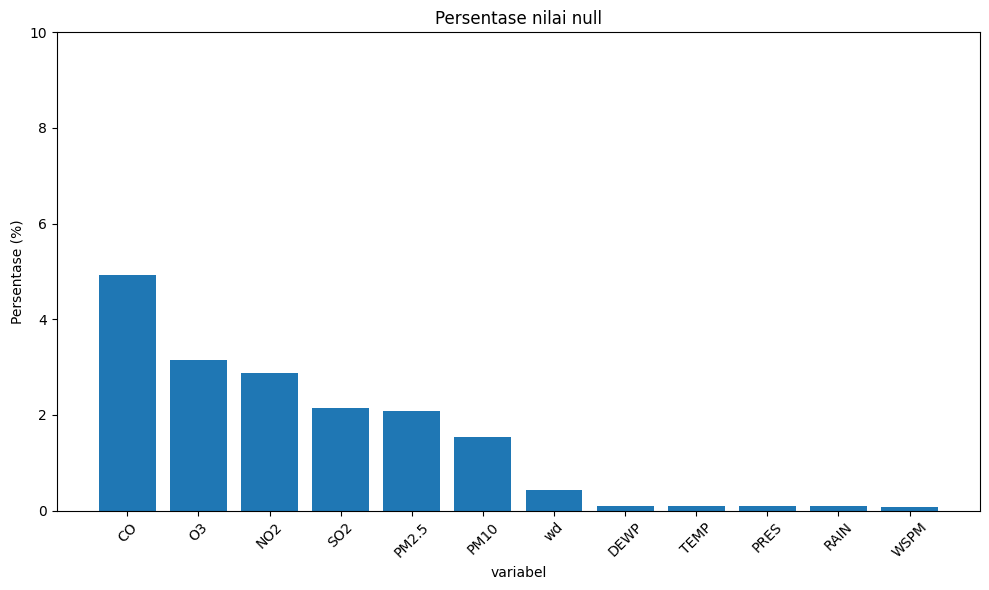

In [4]:

null = droped.isnull().sum() #menghitung NaN tiap kolom
print(null)

null = null[null > 0] #mencari data yang memiliki NaN
persen_null = (null / len(droped)) * 100 #menghitung persentase NaN tiap kolom

persen_null = persen_null.sort_values(ascending=False) #mengurutkan dari persentase tertinggi

#ploting data
plt.figure(figsize=(10, 6))
plt.bar(persen_null.index, persen_null.values)
plt.title('Persentase nilai null')
plt.xlabel('variabel')
plt.ylabel('Persentase (%)')
plt.ylim(0, 10) 
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


Dokumentasi:<br><br>
"null" merupakan variabel untuk menghitung jumlah data hilang yang ada di data menggunakan fungsi isnull() dan menghitung menggunakan sum(). Persentase dihitung dengan dibandingkan dengan keseluruhan data (len(droped)). Kemudian persentase tiap data akan diplot menggunakan bar plot melalui library pyplot (plt.plot).

In [5]:
droped.duplicated().sum()
print("jumlah data terduplikat: ",droped.duplicated().sum())
droped.dtypes

jumlah data terduplikat:  0


year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object

**Insight:**
- Assesing data pertama kali dilakukan dengan syntax "info()" untuk mengethui type data serta banyaknya data null yang harus dibersihkan
- Di bagian ini juga didapatkan presentase untuk jumlah data yang tak terisi.
- Pada bagian ini juga telah diperiksa terkait data yang terduplikasi.

### Cleaning Data

In [6]:
kolom=[] #inisialisasi
for column in droped.items(): #memanggil perulangan menggunakan dict
    kolom.append(column[0]) #berfungsi untuk memasukkan nama kolom

indices_to_remove = {0, 1, 2, 3, 14, 16} #indeks dari kolom
kolom = [kolom[i] for i in range(len(kolom)) if i not in indices_to_remove] #mamsukkan kolom yang harus diisi nilai yang terdapat NaN
for i in kolom:
    droped[i]=droped[i].fillna(droped[i].mean()) #mengisi kolom yang memiliki NaN dengan nilai rat-rata kolom tersebut

droped=droped.dropna()#nilai yang tersisa berupa str sehingga hanya dapat dihapus

#check file setelah clean data
print(droped.isnull().sum())
print("\n===========================================================================\n")
print(droped.head(5))
droped.to_csv('../submission/dashboard/main_data.csv')


year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


   year  month  day  hour  PM2.5  PM10   SO2        NO2     CO    O3  TEMP  \
0  2013      3    1     0    3.0   6.0   3.0   8.000000  300.0  44.0  -0.9   
1  2013      3    1     0    3.0   6.0  13.0   7.000000  300.0  85.0  -2.3   
2  2013      3    1     0    4.0   4.0   3.0  50.638586  200.0  82.0  -2.3   
3  2013      3    1     0    4.0   4.0   4.0   7.000000  300.0  77.0  -0.7   
4  2013      3    1     0    4.0   4.0  14.0  20.000000  300.0  69.0  -0.7   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1025.8 -20.5   0.0   NW   9.3        Shunyi  
1  1020.8 -19.7   0.0    E   0.5     Changping  
2  1020.8 -19.7   0.0    E   0.5      Dingling  
3  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
4  1023.0 -18.8   0.0  NNW   4.4      Guanyuan  


Dokumentasi: <br> <br>
Diawali dengan menginisialisasi "kolom" sebagai tempat list untuk kolom kolom yang akan diisi nilai NaN dengan nilai rata-rata tiap kolom tersebut melalui perulangan. Sedangankan nilai pada kolom ['wd'] yang belum diisi melalui perulangan ini akan dibuang baris yang berisi NaN, mengingat persentasenya dibawah 2% dan tak dapat dilakukan pendekatan statistik karena memiliki data berupa string

**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

2.1 Explore statistik Aotizhongxin

In [7]:
print(data1_df.head(5))

   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  


In [8]:
print(data1_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None


In [9]:
print(data1_df.describe())
print("\n==========================================================================")

                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34139.000000  34346.000000  34129.000000  34041.000000  33288.000000   
mean      82.773611    110.060391     17.375901     59.305833   1262.945145   
std       82.135694     95.223005     22.823017    

2.2 Explore statistik Changping

In [10]:
print(data2_df.head(5))

   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    3.0   6.0  13.0   7.0  300.0  85.0  -2.3   
1   2  2013      3    1     1    3.0   3.0   6.0   6.0  300.0  85.0  -2.5   
2   3  2013      3    1     2    3.0   3.0  22.0  13.0  400.0  74.0  -3.0   
3   4  2013      3    1     3    3.0   6.0  12.0   8.0  300.0  81.0  -3.6   
4   5  2013      3    1     4    3.0   3.0  14.0   8.0  300.0  81.0  -3.5   

     PRES  DEWP  RAIN   wd  WSPM    station  
0  1020.8 -19.7   0.0    E   0.5  Changping  
1  1021.3 -19.0   0.0  ENE   0.7  Changping  
2  1021.3 -19.9   0.0  ENE   0.2  Changping  
3  1021.8 -19.1   0.0  NNE   1.0  Changping  
4  1022.3 -19.4   0.0    N   2.1  Changping  


In [11]:
print(data2_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None


In [12]:
print(data2_df.describe())
print("\n==========================================================================")

                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34290.000000  34482.000000  34436.000000  34397.000000  33543.000000   
mean      71.099743     94.657871     14.958906     44.182086   1152.301345   
std       72.326926     83.441738     20.975331    

2.3 Explore statistik Dingling

In [13]:
print(data3_df.head(5))

   No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0  3.0  NaN  200.0  82.0  -2.3   
1   2  2013      3    1     1    7.0   7.0  3.0  NaN  200.0  80.0  -2.5   
2   3  2013      3    1     2    5.0   5.0  3.0  2.0  200.0  79.0  -3.0   
3   4  2013      3    1     3    6.0   6.0  3.0  NaN  200.0  79.0  -3.6   
4   5  2013      3    1     4    5.0   5.0  3.0  NaN  200.0  81.0  -3.5   

     PRES  DEWP  RAIN   wd  WSPM   station  
0  1020.8 -19.7   0.0    E   0.5  Dingling  
1  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2  1021.3 -19.9   0.0  ENE   0.2  Dingling  
3  1021.8 -19.1   0.0  NNE   1.0  Dingling  
4  1022.3 -19.4   0.0    N   2.1  Dingling  


In [14]:
print(data3_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None


In [15]:
print(data3_df.describe())
print("\n==========================================================================")

                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34285.000000  34408.000000  34334.000000  33830.000000  33052.000000   
mean      65.989497     83.739723     11.749650     27.585467    904.896073   
std       72.267723     79.541685     15.519259    

2.4 Explore statistik Dongsi

In [16]:
print(data4_df.head(5))

   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0  3.0  17.0  300.0  89.0  -0.5   
1   2  2013      3    1     1    4.0   4.0  3.0  16.0  300.0  88.0  -0.7   
2   3  2013      3    1     2    7.0   7.0  NaN  17.0  300.0  60.0  -1.2   
3   4  2013      3    1     3    3.0   3.0  5.0  18.0    NaN   NaN  -1.4   
4   5  2013      3    1     4    3.0   3.0  7.0   NaN  200.0  84.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM station  
0  1024.5 -21.4   0.0  NNW   5.7  Dongsi  
1  1025.1 -22.1   0.0   NW   3.9  Dongsi  
2  1025.3 -24.6   0.0  NNW   5.3  Dongsi  
3  1026.2 -25.5   0.0    N   4.9  Dongsi  
4  1027.1 -24.5   0.0  NNW   3.2  Dongsi  


In [17]:
print(data4_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None


In [18]:
print(data4_df.describe())
print("\n==========================================================================")

                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34314.000000  34511.000000  34401.000000  33463.000000  31867.000000   
mean      86.194297    110.336742     18.531107     53.699443   1330.069131   
std       86.575127     98.219860     22.905655    

2.5 Explore statistik Guanyuan

In [19]:
print(data5_df.head(5))

   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0  14.0  20.0  300.0  69.0  -0.7   
1   2  2013      3    1     1    4.0   4.0  13.0  17.0  300.0  72.0  -1.1   
2   3  2013      3    1     2    3.0   3.0  10.0  19.0  300.0  69.0  -1.1   
3   4  2013      3    1     3    3.0   6.0   7.0  24.0  400.0  62.0  -1.4   
4   5  2013      3    1     4    3.0   6.0   5.0  14.0  400.0  71.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM   station  
0  1023.0 -18.8   0.0  NNW   4.4  Guanyuan  
1  1023.2 -18.2   0.0    N   4.7  Guanyuan  
2  1023.5 -18.2   0.0  NNW   5.6  Guanyuan  
3  1024.5 -19.4   0.0   NW   3.1  Guanyuan  
4  1025.2 -19.5   0.0    N   2.0  Guanyuan  


In [20]:
print(data5_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None


In [21]:
print(data5_df.describe())
print("\n==========================================================================")

                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34448.000000  34635.000000  34590.000000  34405.000000  33311.000000   
mean      82.933372    109.023303     17.590941     57.901643   1271.294377   
std       80.933497     91.573709     23.600367    

2.6 Explore statistik Gucheng

In [22]:
print(data6_df.head(5))

   No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    6.0  18.0  5.0  NaN  800.0  88.0   0.1   
1   2  2013      3    1     1    6.0  15.0  5.0  NaN  800.0  88.0  -0.3   
2   3  2013      3    1     2    5.0  18.0  NaN  NaN  700.0  52.0  -0.7   
3   4  2013      3    1     3    6.0  20.0  6.0  NaN    NaN   NaN  -1.0   
4   5  2013      3    1     4    5.0  17.0  5.0  NaN  600.0  73.0  -1.3   

     PRES  DEWP  RAIN   wd  WSPM  station  
0  1021.1 -18.6   0.0   NW   4.4  Gucheng  
1  1021.5 -19.0   0.0   NW   4.0  Gucheng  
2  1021.5 -19.8   0.0  WNW   4.6  Gucheng  
3  1022.7 -21.2   0.0    W   2.8  Gucheng  
4  1023.0 -21.4   0.0  WNW   3.6  Gucheng  


In [23]:
print(data6_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34418 non-null  float64
 6   PM10     34683 non-null  float64
 7   SO2      34557 non-null  float64
 8   NO2      34396 non-null  float64
 9   CO       33663 non-null  float64
 10  O3       34335 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35013 non-null  float64
 14  RAIN     35021 non-null  float64
 15  wd       34905 non-null  object 
 16  WSPM     35022 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None


In [24]:
print(data6_df.describe())
print("\n==========================================================================")

                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34418.000000  34683.000000  34557.000000  34396.000000  33663.000000   
mean      83.852089    118.861978     15.366162     55.871075   1323.974423   
std       82.796445     96.742626     21.204526    

2.7 Explore statistik Huairou

In [25]:
print(data7_df.head(5))

   No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    7.0   7.0  3.0  2.0  100.0  91.0  -2.3   
1   2  2013      3    1     1    4.0   4.0  3.0  NaN  100.0  92.0  -2.7   
2   3  2013      3    1     2    4.0   4.0  NaN  NaN  100.0  91.0  -3.2   
3   4  2013      3    1     3    3.0   3.0  3.0  2.0    NaN   NaN  -3.3   
4   5  2013      3    1     4    3.0   3.0  7.0  NaN  300.0  86.0  -4.1   

     PRES  DEWP  RAIN   wd  WSPM  station  
0  1020.3 -20.7   0.0  WNW   3.1  Huairou  
1  1020.8 -20.5   0.0  NNW   1.5  Huairou  
2  1020.6 -21.4   0.0   NW   1.8  Huairou  
3  1021.3 -23.7   0.0  NNW   2.4  Huairou  
4  1022.1 -22.7   0.0  NNW   2.2  Huairou  


In [26]:
print(data7_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None


In [27]:
print(data7_df.describe())
print("\n==========================================================================")

                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34111.000000  34287.000000  34084.000000  33425.000000  33642.000000   
mean      69.626367     91.482690     12.121553     32.497250   1022.554545   
std       71.224916     83.289578     18.896912    

2.8 Explore statistik Nongzhanguan

In [28]:
print(data8_df.head(5))

   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    5.0  14.0  4.0  12.0  200.0  85.0  -0.5   
1   2  2013      3    1     1    8.0  12.0  6.0  14.0  200.0  84.0  -0.7   
2   3  2013      3    1     2    3.0   6.0  5.0  14.0  200.0  83.0  -1.2   
3   4  2013      3    1     3    5.0   5.0  5.0  14.0  200.0  84.0  -1.4   
4   5  2013      3    1     4    5.0   5.0  6.0  21.0  200.0  77.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1024.5 -21.4   0.0  NNW   5.7  Nongzhanguan  
1  1025.1 -22.1   0.0   NW   3.9  Nongzhanguan  
2  1025.3 -24.6   0.0  NNW   5.3  Nongzhanguan  
3  1026.2 -25.5   0.0    N   4.9  Nongzhanguan  
4  1027.1 -24.5   0.0  NNW   3.2  Nongzhanguan  


In [29]:
print(data8_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34436 non-null  float64
 6   PM10     34624 non-null  float64
 7   SO2      34618 non-null  float64
 8   NO2      34372 non-null  float64
 9   CO       33858 non-null  float64
 10  O3       34558 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None


In [30]:
print(data8_df.describe())
print("\n==========================================================================")

                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34436.000000  34624.000000  34618.000000  34372.000000  33858.000000   
mean      84.838483    108.991096     18.689242     58.097172   1324.350198   
std       86.225344     95.341177     24.280665    

2.9 Explore statistik Shunyi

In [31]:
print(data9_df.head(5))

   No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    3.0   6.0  3.0  8.0  300.0  44.0  -0.9   
1   2  2013      3    1     1   12.0  12.0  3.0  7.0  300.0  47.0  -1.1   
2   3  2013      3    1     2   14.0  14.0  NaN  7.0  200.0  22.0  -1.7   
3   4  2013      3    1     3   12.0  12.0  3.0  5.0    NaN   NaN  -2.1   
4   5  2013      3    1     4   12.0  12.0  3.0  NaN  200.0  11.0  -2.4   

     PRES  DEWP  RAIN  wd  WSPM station  
0  1025.8 -20.5   0.0  NW   9.3  Shunyi  
1  1026.1 -21.3   0.0  NW   9.4  Shunyi  
2  1026.2 -23.0   0.0  NW   8.6  Shunyi  
3  1027.3 -23.3   0.0  NW   6.6  Shunyi  
4  1027.7 -22.9   0.0  NW   4.5  Shunyi  


In [32]:
print(data9_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None


In [33]:
print(data9_df.describe())
print("\n==========================================================================")

                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34151.000000  34516.000000  33768.000000  33699.000000  32886.000000   
mean      79.491602     98.737026     13.572039     43.908865   1187.063979   
std       81.231739     89.143718     19.572068    

2.10 Explore statistik Tiantan

In [34]:
print(data10_df.head(5))

   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    6.0   6.0  4.0   8.0  300.0  81.0  -0.5   
1   2  2013      3    1     1    6.0  29.0  5.0   9.0  300.0  80.0  -0.7   
2   3  2013      3    1     2    6.0   6.0  4.0  12.0  300.0  75.0  -1.2   
3   4  2013      3    1     3    6.0   6.0  4.0  12.0  300.0  74.0  -1.4   
4   5  2013      3    1     4    5.0   5.0  7.0  15.0  400.0  70.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM  station  
0  1024.5 -21.4   0.0  NNW   5.7  Tiantan  
1  1025.1 -22.1   0.0   NW   3.9  Tiantan  
2  1025.3 -24.6   0.0  NNW   5.3  Tiantan  
3  1026.2 -25.5   0.0    N   4.9  Tiantan  
4  1027.1 -24.5   0.0  NNW   3.2  Tiantan  


In [35]:
print(data10_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None


In [36]:
print(data10_df.describe())
print("\n==========================================================================")

                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34387.000000  34467.000000  33946.000000  34320.000000  33938.000000   
mean      82.164911    106.363672     14.367615     53.162646   1298.303318   
std       80.921384     89.700157     20.144631    

2.11 Explore statistik Wanliu

In [37]:
print(data11_df.head(5))

   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    8.0   8.0  6.0  28.0  400.0  52.0  -0.7   
1   2  2013      3    1     1    9.0   9.0  6.0  28.0  400.0  50.0  -1.1   
2   3  2013      3    1     2    3.0   6.0  NaN  19.0  400.0  55.0  -1.1   
3   4  2013      3    1     3   11.0  30.0  8.0  14.0    NaN   NaN  -1.4   
4   5  2013      3    1     4    3.0  13.0  9.0   NaN  300.0  54.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM station  
0  1023.0 -18.8   0.0  NNW   4.4  Wanliu  
1  1023.2 -18.2   0.0    N   4.7  Wanliu  
2  1023.5 -18.2   0.0  NNW   5.6  Wanliu  
3  1024.5 -19.4   0.0   NW   3.1  Wanliu  
4  1025.2 -19.5   0.0    N   2.0  Wanliu  


In [38]:
print(data11_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34682 non-null  float64
 6   PM10     34780 non-null  float64
 7   SO2      34489 non-null  float64
 8   NO2      33994 non-null  float64
 9   CO       33252 non-null  float64
 10  O3       32957 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34941 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None


In [39]:
print(data11_df.describe())
print("\n==========================================================================")

                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34682.000000  34780.000000  34489.000000  33994.000000  33252.000000   
mean      83.374716    110.464618     18.376481     65.258789   1319.353513   
std       81.905568     92.795065     22.609648    

2.12 Explore statistik Wanshouxigong

In [40]:
print(data12_df.head(5))

   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0  6.0  17.0  200.0  62.0   0.3   
1   2  2013      3    1     1   11.0  11.0  7.0  14.0  200.0  66.0  -0.1   
2   3  2013      3    1     2    8.0   8.0  NaN  16.0  200.0  59.0  -0.6   
3   4  2013      3    1     3    8.0   8.0  3.0  16.0    NaN   NaN  -0.7   
4   5  2013      3    1     4    8.0   8.0  3.0   NaN  300.0  36.0  -0.9   

     PRES  DEWP  RAIN   wd  WSPM        station  
0  1021.9 -19.0   0.0  WNW   2.0  Wanshouxigong  
1  1022.4 -19.3   0.0  WNW   4.4  Wanshouxigong  
2  1022.6 -19.7   0.0  WNW   4.7  Wanshouxigong  
3  1023.5 -20.9   0.0   NW   2.6  Wanshouxigong  
4  1024.1 -21.7   0.0  WNW   2.5  Wanshouxigong  


In [41]:
print(data12_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None


In [42]:
print(data12_df.describe())
print("\n==========================================================================")

                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2          NO2            CO  \
count  34368.000000  34580.000000  34395.000000  34310.00000  33767.000000   
mean      85.024136    112.223459     17.148603     55.52956   1370.395031   
std       85.975981     97.593210     23.940834     35

Dokumentasi: <br> <br>
tiap-tiap daerah (dari variabel yang telah dibuat otomatis) dilakukan explorasi secara statistik menggunakan .info() dan .decribe()

2.13 Peta korelasi tiap variabel untuk semua data

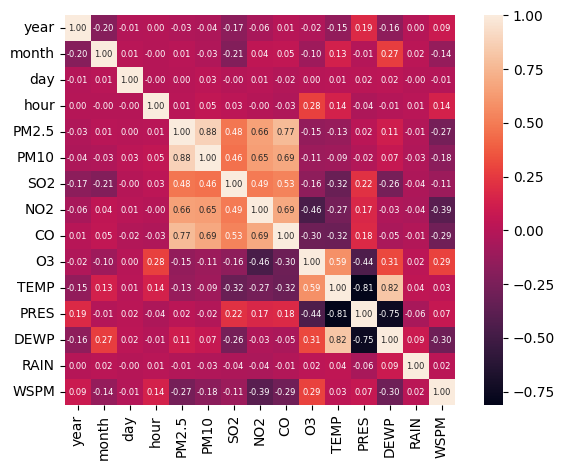

In [43]:
cor=droped.corr(numeric_only=True) #membuat nilai korelasi variabel a terhadap variabel b
sb.heatmap(cor, annot=True, fmt=".2f", cbar=True, square=True, 
            annot_kws={"size": 6}) #membuat heatmap
plt.tight_layout()
plt.show()

Dokumentasi: <br>
Peta korelasi dibuat menggunakan fungsi dari pandas yaitu corr() yang divisualisasikan dengan seaborn
<br><br>
Insight: <br>
Korelasi antar partikel SO2,NO2,CO,O3 beserta indeks PM2.5 dan PM10 memiliki nilai korelasi diatas 0.5 yang artinya berhubungan positif. Sedangkan tempertur dan tekanan memiliki hubungan berbanding terbalik

2.14 Rata-rata indeks polutan berdasarkan PM2.5 dan PM10 untuk tiap daerah beserta heatmap pada peta

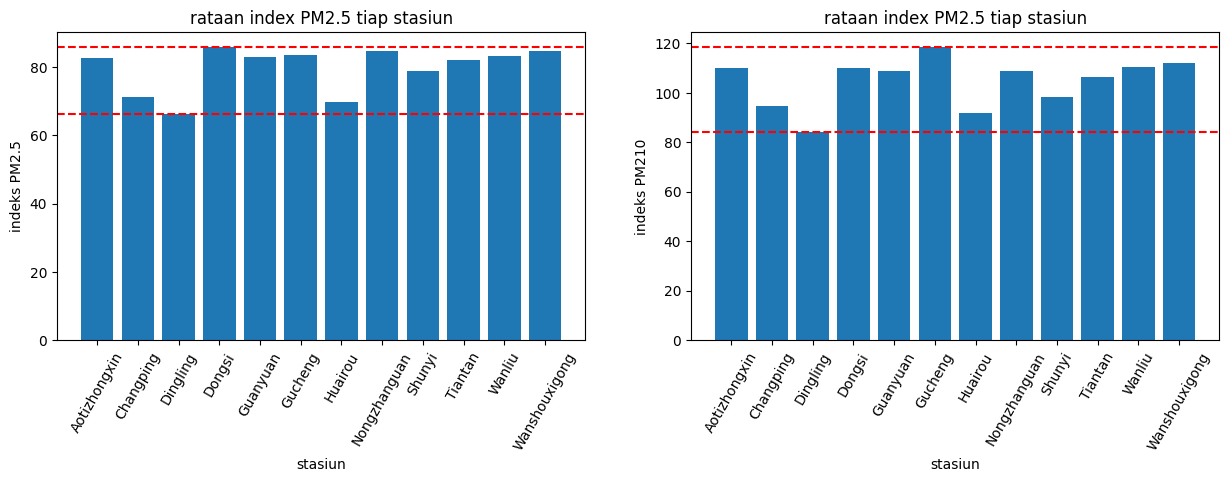

In [44]:
stasiun = sorted(droped['station'].unique())
rataan = droped.groupby('station')['PM2.5'].mean()
rataan2 = droped.groupby('station')['PM10'].mean()

plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.bar(stasiun,rataan)
plt.axhline(y=min(rataan), color='r', linestyle='--',label=f'nilai min')
plt.axhline(y=max(rataan), color='r', linestyle='--',label=f'nilai max')
plt.xticks(rotation=60)
plt.title("rataan index PM2.5 tiap stasiun")
plt.ylabel("indeks PM2.5")
plt.xlabel("stasiun")

plt.subplot(1, 2, 2)
plt.bar(stasiun,rataan2)
plt.axhline(y=min(rataan2), color='r', linestyle='--',label=f'nilai min')
plt.axhline(y=max(rataan2), color='r', linestyle='--',label=f'nilai max')
plt.xticks(rotation=60)
plt.title("rataan index PM2.5 tiap stasiun")
plt.ylabel("indeks PM210")
plt.xlabel("stasiun")
plt.show()

Dokumntasi:<br>
- stasiun = sorted(droped['station'].unique()) untuk menyortir nama stasiun dan diurutkan agar sesuai dengan group by nantinya
- rataan = droped.groupby('station')['PM2.5'].mean() untuk menghitung rata-rata tabel PM2.5 untuk tiap-tiap kelompok stasiun
- rataan2 = droped.groupby('station')['PM10'].mean() untuk menghitung rata-rata tabel PM10 untuk tiap-tiap kelompok stasiun
- plt.subplot() membentuk lebih dari 1 plot dalam 1 gambar
- plt.bar(stasiun,rataan2), membentuk bar plot (berlaku untuk kedua plot)
- plt.axhlin(), fungsi untuk memotong garis secara horizontal untuk menandai nilai terendah dan tertinggi

In [45]:
stasiun = ['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan', 
           'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan', 
           'Wanliu', 'Wanshouxigong']
#berdasarkan google map
koor = {
    'Aotizhongxin': (39.988, 116.407),
    'Changping': (40.217, 116.231),
    'Dingling': (40.296, 116.181),
    'Dongsi': (39.928, 116.417),
    'Guanyuan': (39.933, 116.365),
    'Gucheng': (39.927, 116.202),
    'Huairou': (40.316, 116.637),
    'Nongzhanguan': (39.936, 116.454),
    'Shunyi': (40.126, 116.654),
    'Tiantan': (39.883, 116.412),
    'Wanliu': (39.974, 116.299),
    'Wanshouxigong': (39.886, 116.361)
}

rataan = droped.groupby('station')['PM2.5'].mean()
rataan_df = rataan.reset_index()

rataan_df['coordinates'] = rataan_df['station'].map(koor)
rataan_df['geometry'] = rataan_df['coordinates'].apply(lambda x: Point(x[1], x[0]))

gdf = gpd.GeoDataFrame(rataan_df, geometry='geometry')
gdf.set_crs(epsg=4326, inplace=True)

m = folium.Map(location=[39.9, 116.4], zoom_start=9, tiles='CartoDB positron', 
                scrollWheelZoom=False, zoom_control=False)

heat_data = [[point.y, point.x, pm] for point, pm in zip(gdf.geometry, gdf['PM2.5']) if 60 <= pm <= 90]
gradient = {
    0.0: 'blue',
    0.4: 'green',
    0.7: 'yellow',     
    1.0: 'red'
}

max_pm25 = 90 
heat_data_scaled = [[point[0], point[1], point[2] / max_pm25] for point in heat_data]

HeatMap(
    heat_data_scaled, 
    gradient=gradient, 
    radius=25, 
    blur=15
).add_to(m)

for station, (lat, lon) in koor.items():
    pm_value = rataan_df.loc[rataan_df['station'] == station, 'PM2.5'].values[0]
    folium.Marker(
        location=[lat, lon],
        popup=f"{station}: {pm_value:.2f}",
        icon=folium.Icon(color='blue')
    ).add_to(m)

m


In [46]:
stasiun = ['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan', 
           'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan', 
           'Wanliu', 'Wanshouxigong']
#berdasarkan google map
koor = {
    'Aotizhongxin': (39.988, 116.407),
    'Changping': (40.217, 116.231),
    'Dingling': (40.296, 116.181),
    'Dongsi': (39.928, 116.417),
    'Guanyuan': (39.933, 116.365),
    'Gucheng': (39.927, 116.202),
    'Huairou': (40.316, 116.637),
    'Nongzhanguan': (39.936, 116.454),
    'Shunyi': (40.126, 116.654),
    'Tiantan': (39.883, 116.412),
    'Wanliu': (39.974, 116.299),
    'Wanshouxigong': (39.886, 116.361)
}

rataan = droped.groupby('station')['PM10'].mean()
rataan_df = rataan.reset_index()

rataan_df['coordinates'] = rataan_df['station'].map(koor)
rataan_df['geometry'] = rataan_df['coordinates'].apply(lambda x: Point(x[1], x[0]))

gdf = gpd.GeoDataFrame(rataan_df, geometry='geometry')
gdf.set_crs(epsg=4326, inplace=True)

m = folium.Map(location=[39.9, 116.4], zoom_start=10, tiles='CartoDB positron', 
                scrollWheelZoom=False, zoom_control=False)

heat_data = [[point.y, point.x, pm] for point, pm in zip(gdf.geometry, gdf['PM10']) if 80 <= pm <= 120]
gradient = {
    0.0: 'blue',
    0.4: 'green',
    0.7: 'yellow',     
    1.0: 'red'
}

max_pm25 = 90 
heat_data_scaled = [[point[0], point[1], point[2] / max_pm25] for point in heat_data]

HeatMap(
    heat_data_scaled, 
    gradient=gradient, 
    radius=25, 
    blur=15
).add_to(m)

for station, (lat, lon) in koor.items():
    pm_value = rataan_df.loc[rataan_df['station'] == station, 'PM10'].values[0]
    folium.Marker(
        location=[lat, lon],
        popup=f"{station}: {pm_value:.2f}",
        icon=folium.Icon(color='blue')
    ).add_to(m)
m

Dokumentasi (berlaku untuk 2 kode diatas, hanya diganti PM2.5 dan PM10) : <br>
- stasiun memanggil nama 'station'
- koor memberikan koordinat (latitude,longtitude)#didapat dari AI
- rataan berfungsi memanggil nilai rata rata dari indeks PM2.5 dan PM10
- rataan_df untuk membentuk index yang akan digunakan dalam geodataframe
- Folium map mengambil data map beijing
- Heatmap membentuk warna berdasar rentang nilai PM2.5 dan PM10.
- folium.Marker() untuk penanda
- m untuk menampilkan map versi html

Berdasarkan data di atas didapatkan bahwa, daerah Dingling, Changping, dan Guanyuan menjadi tempat dengan kualitas udara paling baik (indeks PM2.5 dan PM 10 rendah)

2.15 Hubungan Indeks PM2.5 dengan Unsur kimia berbahaya

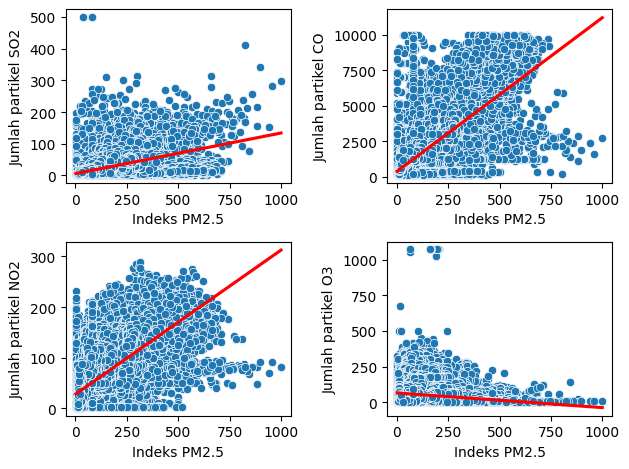

In [50]:

x = droped['PM2.5']

plt.subplot(2, 2, 1)
sb.scatterplot(x=x, y=droped['SO2'])
sb.regplot(x=x, y=droped['SO2'], scatter=False, color='r')
plt.ylabel('Jumlah partikel SO2')
plt.xlabel('Indeks PM2.5')

plt.subplot(2, 2, 2)
sb.scatterplot(x=x, y=droped['CO'])
sb.regplot(x=x, y=droped['CO'], scatter=False, color='r')
plt.ylabel('Jumlah partikel CO')
plt.xlabel('Indeks PM2.5')

plt.subplot(2, 2, 3)
sb.scatterplot(x=x, y=droped['NO2'])
sb.regplot(x=x, y=droped['NO2'], scatter=False, color='r')
plt.ylabel('Jumlah partikel NO2')
plt.xlabel('Indeks PM2.5')

plt.subplot(2, 2, 4)
sb.scatterplot(x=x, y=droped['O3'])
sb.regplot(x=x, y=droped['O3'], scatter=False, color='r')
plt.ylabel('Jumlah partikel O3')
plt.xlabel('Indeks PM2.5')

plt.tight_layout()
plt.show()

Dokumentasi:
- Variabel x untuk data PM2.5
- plt.scattr untuk membentuk plot scater dari tiap-tiap partikel terhadap PM2.5
- m,b merupakan variabel hasil dari fungsi polyfit untuk mendapatkan nilai koefisien dari regresi linear
- plot berikutnya untuk regresi linear

2.16 Hubungan Indeks PM10 dengan Unsur kimia berbahaya

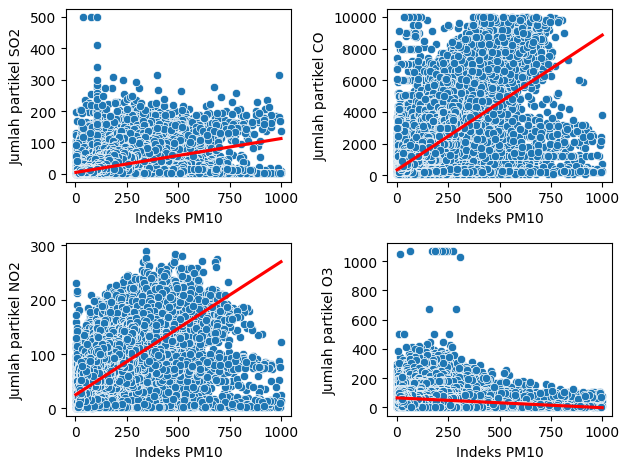

In [49]:
x = droped['PM10']
plt.subplot(2, 2, 1)
sb.scatterplot(x=x, y=droped['SO2'])
sb.regplot(x=x, y=droped['SO2'], scatter=False, color='r')
plt.ylabel('Jumlah partikel SO2')
plt.xlabel('Indeks PM10')

plt.subplot(2, 2, 2)
sb.scatterplot(x=x, y=droped['CO'])
sb.regplot(x=x, y=droped['CO'], scatter=False, color='r')
plt.ylabel('Jumlah partikel CO')
plt.xlabel('Indeks PM10')

plt.subplot(2, 2, 3)
sb.scatterplot(x=x, y=droped['NO2'])
sb.regplot(x=x, y=droped['NO2'], scatter=False, color='r')
plt.ylabel('Jumlah partikel NO2')
plt.xlabel('Indeks PM10')

plt.subplot(2, 2, 4)
sb.scatterplot(x=x, y=droped['O3'])
sb.regplot(x=x, y=droped['O3'], scatter=False, color='r')
plt.ylabel('Jumlah partikel O3')
plt.xlabel('Indeks PM10')

plt.tight_layout()
plt.show()

Dokumentasi:
- Variabel x untuk data PM10
- plt.scattr untuk membentuk plot scater dari tiap-tiap partikel terhadap PM10
- m,b merupakan variabel hasil dari fungsi polyfit untuk mendapatkan nilai koefisien dari regresi linear
- plot berikutnya untuk regresi linear

2.17 Nilai rataan indeks PM2.5 dan PM10 tiap waktu

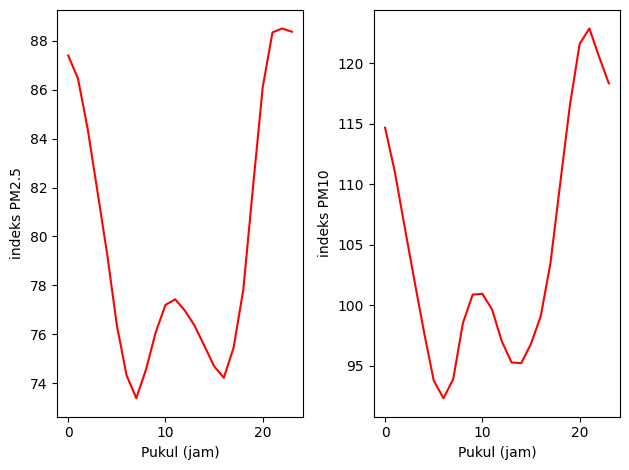

In [49]:
jam = sorted(droped['hour'].unique())
rataan = droped.groupby('hour')['PM2.5'].mean()
rataan2 = droped.groupby('hour')['PM10'].mean()
plt.subplot(1, 2, 1)
plt.plot(jam,rataan,"r-",label='PM2.5')
plt.ylabel("indeks PM2.5")
plt.xlabel("Pukul (jam)")
plt.subplot(1, 2, 2)
plt.plot(jam,rataan2,"r-",label='PM10')
plt.ylabel("indeks PM10")
plt.xlabel("Pukul (jam)")

plt.tight_layout()
plt.show()

Dokumentasi:<br>
- jam = sorted(droped['hour'].unique()) mengurutkan jam di data
- rataan = droped.groupby('hour')['PM2.5'].mean() menghitung rata-rata PM2.5 tiap jam
- rataan2 = droped.groupby('hour')['PM10'].mean() menghitung rata-rata PM10 tiap jam
- plt.plot untuk melakukan ploting data berupa plot garis

2.18 Hubungan antara kecepatan angin dengan waktu

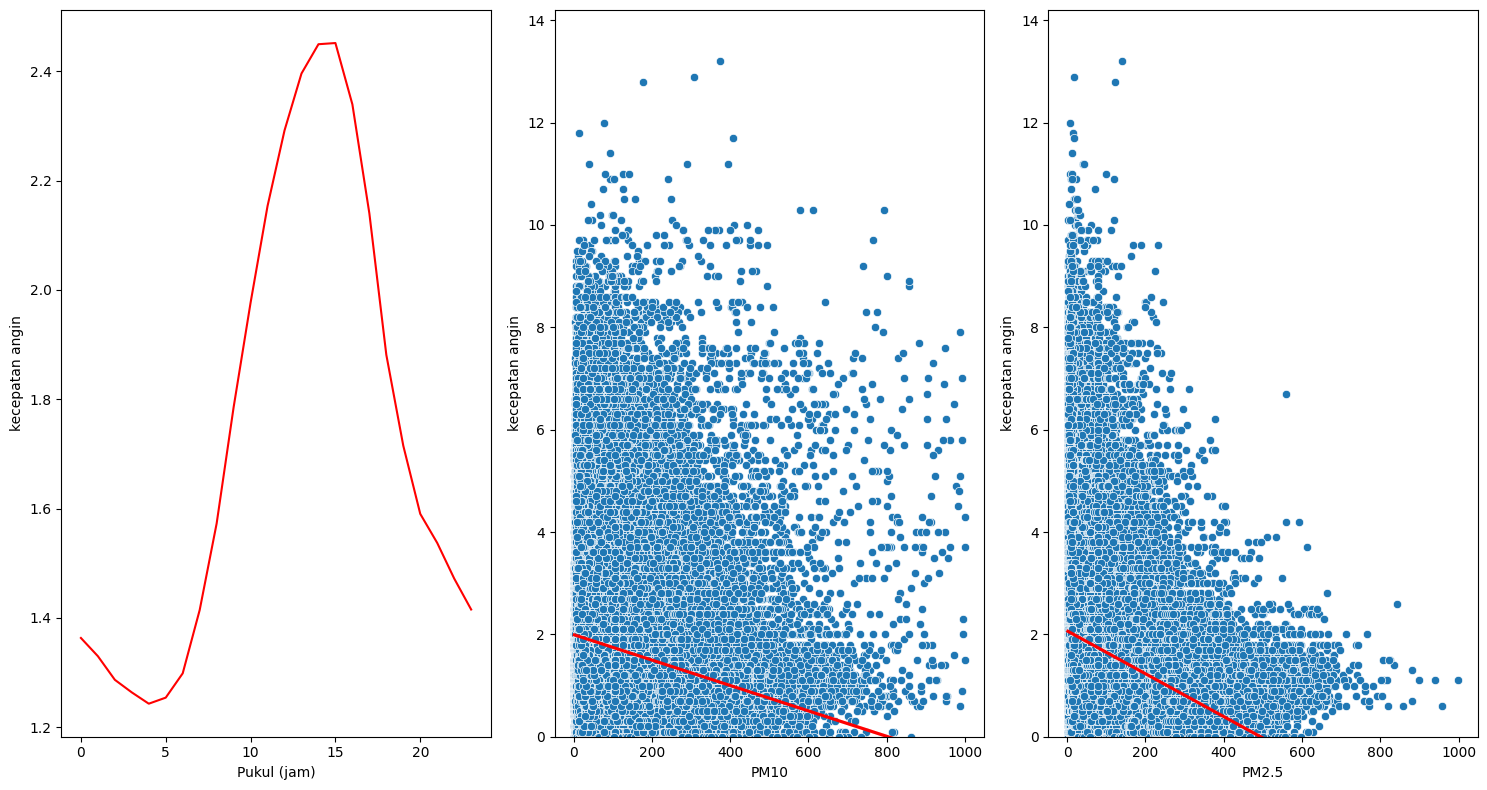

In [48]:
jam = sorted(droped['hour'].unique())
rataan = droped.groupby('hour')['WSPM'].mean()
plt.figure(figsize=(15, 8))
plt.subplot(1, 3, 1)
plt.plot(jam,rataan,"r-",label='PM2.5')
plt.ylabel("kecepatan angin")
plt.xlabel("Pukul (jam)")
plt.subplot(1, 3, 2)
sb.scatterplot(x=droped['PM10'],y=droped['WSPM'])
sb.regplot(x=droped['PM10'],y=droped['WSPM'], scatter=False, color='r')
plt.ylim(0, max(droped['WSPM']) + 1)
plt.ylabel("kecepatan angin")
plt.xlabel("PM10")

plt.subplot(1, 3, 3)
sb.scatterplot(x=droped['PM2.5'],y=droped['WSPM'])
sb.regplot(x=droped['PM2.5'],y=droped['WSPM'], scatter=False, color='r')
plt.ylabel("kecepatan angin")
plt.xlabel("PM2.5")
plt.ylim(0, max(droped['WSPM']) + 1)

plt.tight_layout()
plt.show()

Dokumentasi: <br>
- jam = sorted(droped['hour'].unique()) mengurutkan jam di data
- rataan = droped.groupby('hour')['WSPM'].mean() menghitung rata-rata kecepatan angin tiap jam
- plt.plot untuk melakukan ploting data berupa plot garis
- plt.scattr untuk membentuk plot scater dari kecepatan angin terhadap PM2.5 dan PM10
- m,b merupakan variabel hasil dari fungsi polyfit untuk mendapatkan nilai koefisien dari regresi linear
- plot berikutnya untuk regresi linear

2.19 Bagaimana temperatur,tekanan, dan O3 di tiap stasiun

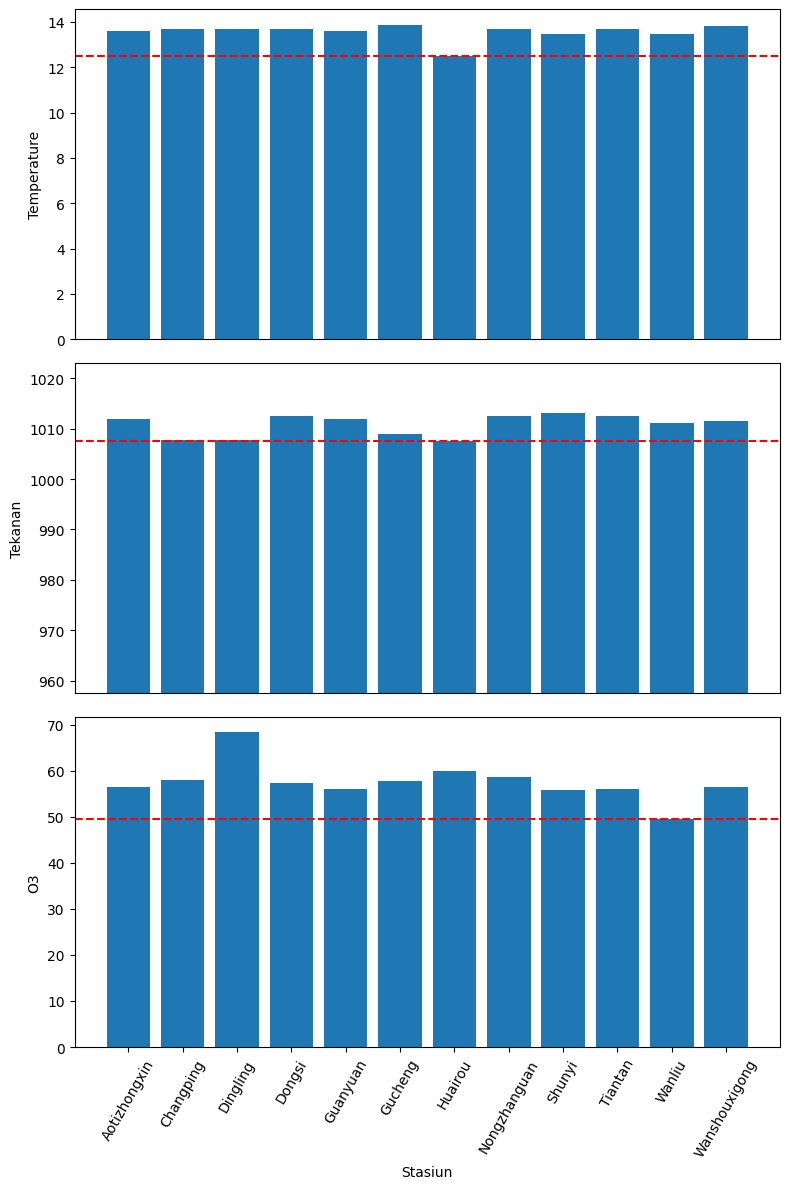

In [51]:
stasiun = sorted(droped['station'].unique())
rataan = droped.groupby('station')['TEMP'].mean()
rataan2 = droped.groupby('station')['PRES'].mean()
rataan3 = droped.groupby('station')['O3'].mean()

plt.figure(figsize=(8, 12))
plt.subplot(3, 1, 1)
plt.bar(stasiun,rataan,label='TEMPERATUR')
plt.ylabel("Temperature")
plt.axhline(y=min(rataan), color='r', linestyle='--',label=f'nilai max')
plt.xticks([])


plt.subplot(3, 1, 2)
plt.bar(stasiun,rataan2,label='TEKANAN')
plt.ylabel("Tekanan")
plt.axhline(y=min(rataan2), color='r', linestyle='--',label=f'nilai min')
plt.xticks([])
plt.ylim(min(rataan2)-50,max(rataan2)+10)

plt.subplot(3, 1, 3)
plt.bar(stasiun,rataan3,label='O3')
plt.ylabel("O3")
plt.xlabel("Stasiun")
plt.axhline(y=min(rataan3), color='r', linestyle='--',label=f'nilai min')
plt.xticks(rotation=60)

plt.tight_layout()
plt.show()


**Insight:**
- Exploratory data dilakukan dengan mengesplor data secara statistik dan melihat hubungan antar variabel dengan tools seperti regresi dan ploting scatter.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Daerah Mana yang memiliki indeks kualitas udara paling baik? dan mengapa? (analisis lanjutan geo analisis)

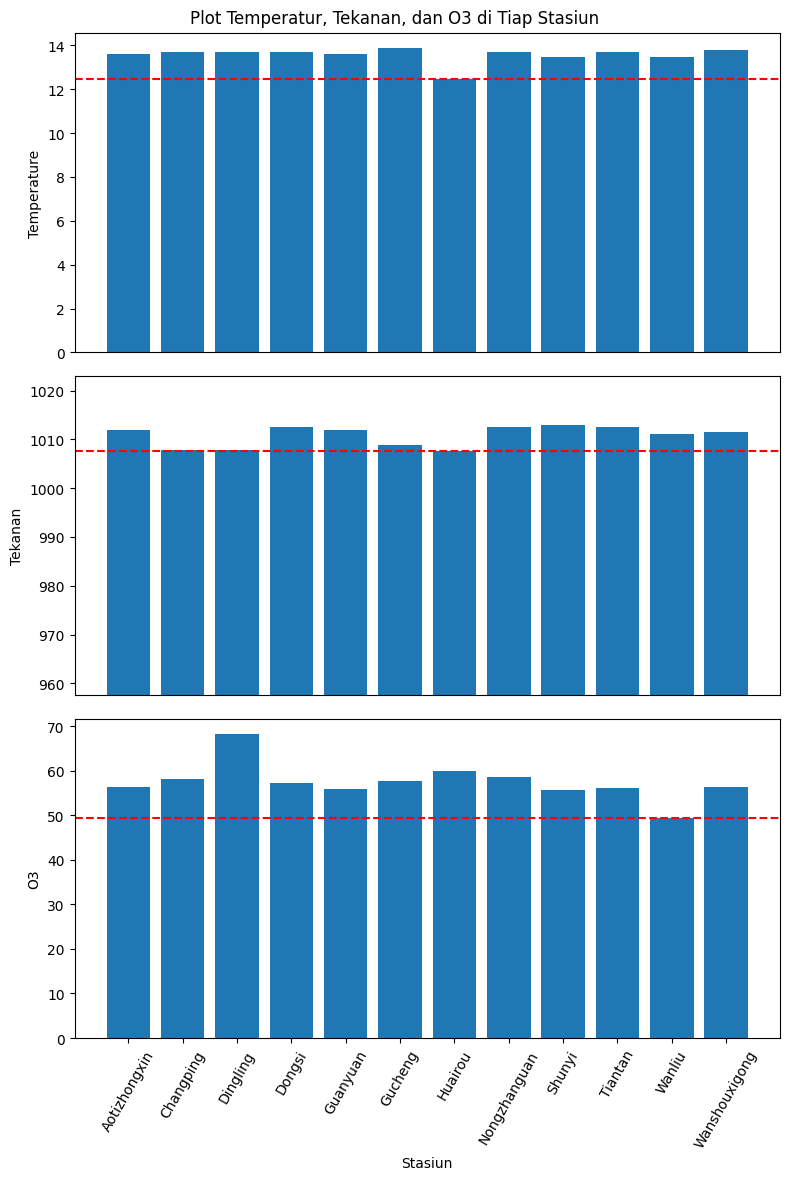

In [52]:
stasiun = sorted(droped['station'].unique())
rataan = droped.groupby('station')['TEMP'].mean()
rataan2 = droped.groupby('station')['PRES'].mean()
rataan3 = droped.groupby('station')['O3'].mean()

plt.figure(figsize=(8, 12))
plt.suptitle("Plot Temperatur, Tekanan, dan O3 di Tiap Stasiun")
plt.subplot(3, 1, 1)
plt.bar(stasiun,rataan,label='TEMPERATUR')
plt.ylabel("Temperature")
plt.axhline(y=min(rataan), color='r', linestyle='--',label=f'nilai max')
plt.xticks([])


plt.subplot(3, 1, 2)
plt.bar(stasiun,rataan2,label='TEKANAN')
plt.ylabel("Tekanan")
plt.axhline(y=min(rataan2), color='r', linestyle='--',label=f'nilai min')
plt.xticks([])
plt.ylim(min(rataan2)-50,max(rataan2)+10)

plt.subplot(3, 1, 3)
plt.bar(stasiun,rataan3,label='O3')
plt.ylabel("O3")
plt.xlabel("Stasiun")
plt.axhline(y=min(rataan3), color='r', linestyle='--',label=f'nilai min')
plt.xticks(rotation=60)

plt.tight_layout()
plt.show()


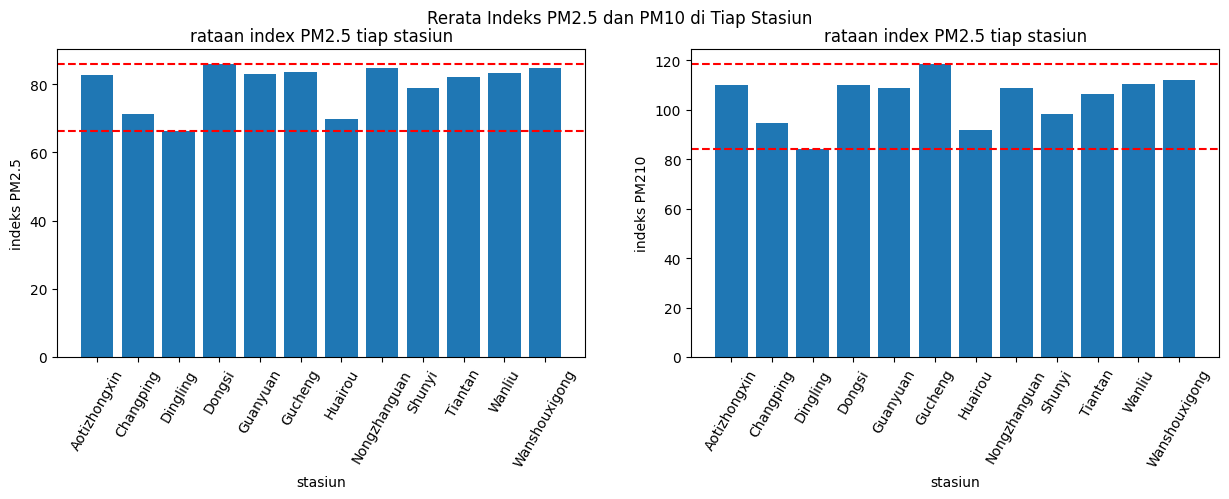

In [53]:
stasiun = sorted(droped['station'].unique())
rataan = droped.groupby('station')['PM2.5'].mean()
rataan2 = droped.groupby('station')['PM10'].mean()

plt.figure(figsize=(15, 4))
plt.suptitle("Rerata Indeks PM2.5 dan PM10 di Tiap Stasiun")
plt.subplot(1, 2, 1)
plt.bar(stasiun,rataan)
plt.axhline(y=min(rataan), color='r', linestyle='--',label=f'nilai min')
plt.axhline(y=max(rataan), color='r', linestyle='--',label=f'nilai max')
plt.xticks(rotation=60)
plt.title("rataan index PM2.5 tiap stasiun")
plt.ylabel("indeks PM2.5")
plt.xlabel("stasiun")

plt.subplot(1, 2, 2)
plt.bar(stasiun,rataan2)
plt.axhline(y=min(rataan2), color='r', linestyle='--',label=f'nilai min')
plt.axhline(y=max(rataan2), color='r', linestyle='--',label=f'nilai max')
plt.xticks(rotation=60)
plt.title("rataan index PM2.5 tiap stasiun")
plt.ylabel("indeks PM210")
plt.xlabel("stasiun")
plt.show()

Ketiga daerah terendah dengan indeks polutan udara berdasarkan PM2.5 dan PM.10 adalah Huairou, Dingling, dan Changping. Dari plot temperatur, tekanan, dan O3 menunjukkan (hipotesis) berada pada daerah dataran tinggi. Dataran tinggi cenderung memiliki temperatur yang rendah serta tekanan, hipotesis ini diperkuat dengan tingginya tingkat O3 yang umum pada daerah dataran tinggi Dataran tinggi umumnya memiliki kegiatan industrial dan aktivitas manusia yang lebih rendah dari daerah perkotaan, ini menjadikan salah satu sebab dari mengapa daerah ini memiliki kualitas udara yang lebih baik. Data ini menunjukkan bahwa keadaan sosial dan lingkungan yang berbeda-beda tiap daerah dapat berpengaruh pada baik-buruknya kualitas udara <br>
( Sumber :https://study.com/academy/lesson/the-effect-of-altitude-on-air-pressure.html#:~:text=yet%20closely%20related.-,As%20altitude%20on%20Earth%20increases%2C%20the%20air%20becomes%20less%20dense,the%20pressure%20is%20much%20reduced.)

### Pertanyaan 2: Unsur kimia mana yang paling berpengaruh terhadap nilai indeks kualitas udara berdasarkan PM2.5 dan PM10?

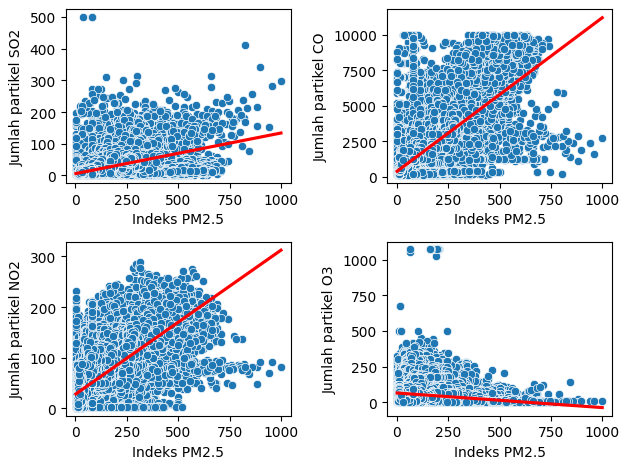

In [51]:

x = droped['PM2.5']

plt.subplot(2, 2, 1)
sb.scatterplot(x=x, y=droped['SO2'])
sb.regplot(x=x, y=droped['SO2'], scatter=False, color='r')
plt.ylabel('Jumlah partikel SO2')
plt.xlabel('Indeks PM2.5')

plt.subplot(2, 2, 2)
sb.scatterplot(x=x, y=droped['CO'])
sb.regplot(x=x, y=droped['CO'], scatter=False, color='r')
plt.ylabel('Jumlah partikel CO')
plt.xlabel('Indeks PM2.5')

plt.subplot(2, 2, 3)
sb.scatterplot(x=x, y=droped['NO2'])
sb.regplot(x=x, y=droped['NO2'], scatter=False, color='r')
plt.ylabel('Jumlah partikel NO2')
plt.xlabel('Indeks PM2.5')

plt.subplot(2, 2, 4)
sb.scatterplot(x=x, y=droped['O3'])
sb.regplot(x=x, y=droped['O3'], scatter=False, color='r')
plt.ylabel('Jumlah partikel O3')
plt.xlabel('Indeks PM2.5')

plt.tight_layout()
plt.show()

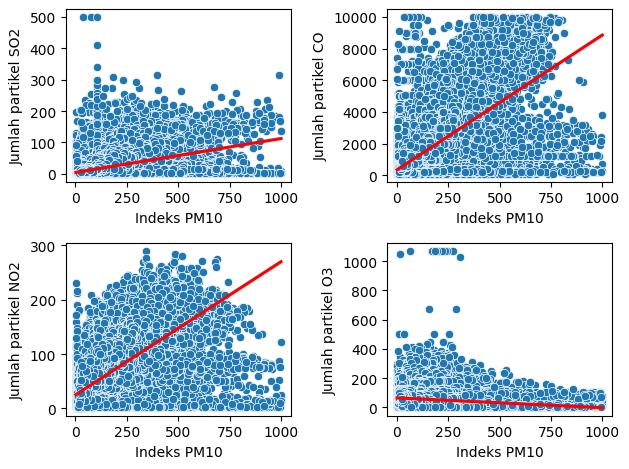

In [52]:
x = droped['PM10']
plt.subplot(2, 2, 1)
sb.scatterplot(x=x, y=droped['SO2'])
sb.regplot(x=x, y=droped['SO2'], scatter=False, color='r')
plt.ylabel('Jumlah partikel SO2')
plt.xlabel('Indeks PM10')

plt.subplot(2, 2, 2)
sb.scatterplot(x=x, y=droped['CO'])
sb.regplot(x=x, y=droped['CO'], scatter=False, color='r')
plt.ylabel('Jumlah partikel CO')
plt.xlabel('Indeks PM10')

plt.subplot(2, 2, 3)
sb.scatterplot(x=x, y=droped['NO2'])
sb.regplot(x=x, y=droped['NO2'], scatter=False, color='r')
plt.ylabel('Jumlah partikel NO2')
plt.xlabel('Indeks PM10')

plt.subplot(2, 2, 4)
sb.scatterplot(x=x, y=droped['O3'])
sb.regplot(x=x, y=droped['O3'], scatter=False, color='r')
plt.ylabel('Jumlah partikel O3')
plt.xlabel('Indeks PM10')

plt.tight_layout()
plt.show()

Dengan menggunakan regresi linear dan plotting scatter terdapat hubungan antara beberapa partikel dengan indeks PM2.5 dan PM10. Partikel CO, NO2 dan SO2(walau tak setinggi yang lainya) memiliki hubungan kesetaraan yang positif, artinya ketiga partikel ini menyebabkan peningkatan nilai pada kedua indeks apabila mengalami peningkatan nilai. Sedangkan O3, tidak terlalu berkorelasi, hal ini dihipotesis karena O3 mudah ditemukan pada daerah tinggi dan mudah untuk mengalami pemecahan pada ketinggian tersebut.

### Pertanyaan 3: Bagaimana tingkat polusi rata-rata tiap waktunya? dan dipengaruhi oleh apa?

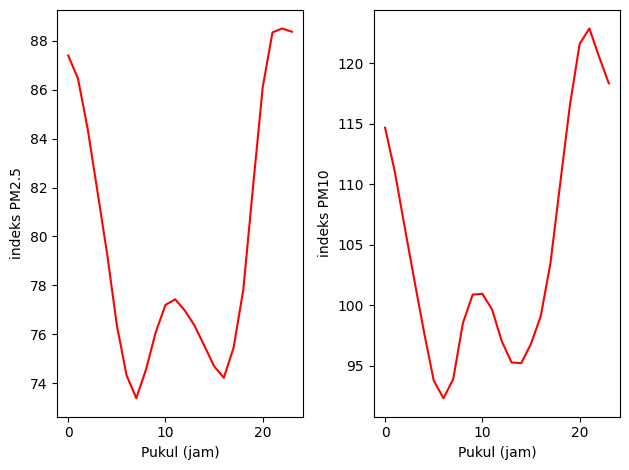

In [56]:
jam = sorted(droped['hour'].unique())
rataan = droped.groupby('hour')['PM2.5'].mean()
rataan2 = droped.groupby('hour')['PM10'].mean()
plt.subplot(1, 2, 1)
plt.plot(jam,rataan,"r-",label='PM2.5')
plt.ylabel("indeks PM2.5")
plt.xlabel("Pukul (jam)")
plt.subplot(1, 2, 2)
plt.plot(jam,rataan2,"r-",label='PM10')
plt.ylabel("indeks PM10")
plt.xlabel("Pukul (jam)")

plt.tight_layout()
plt.show()

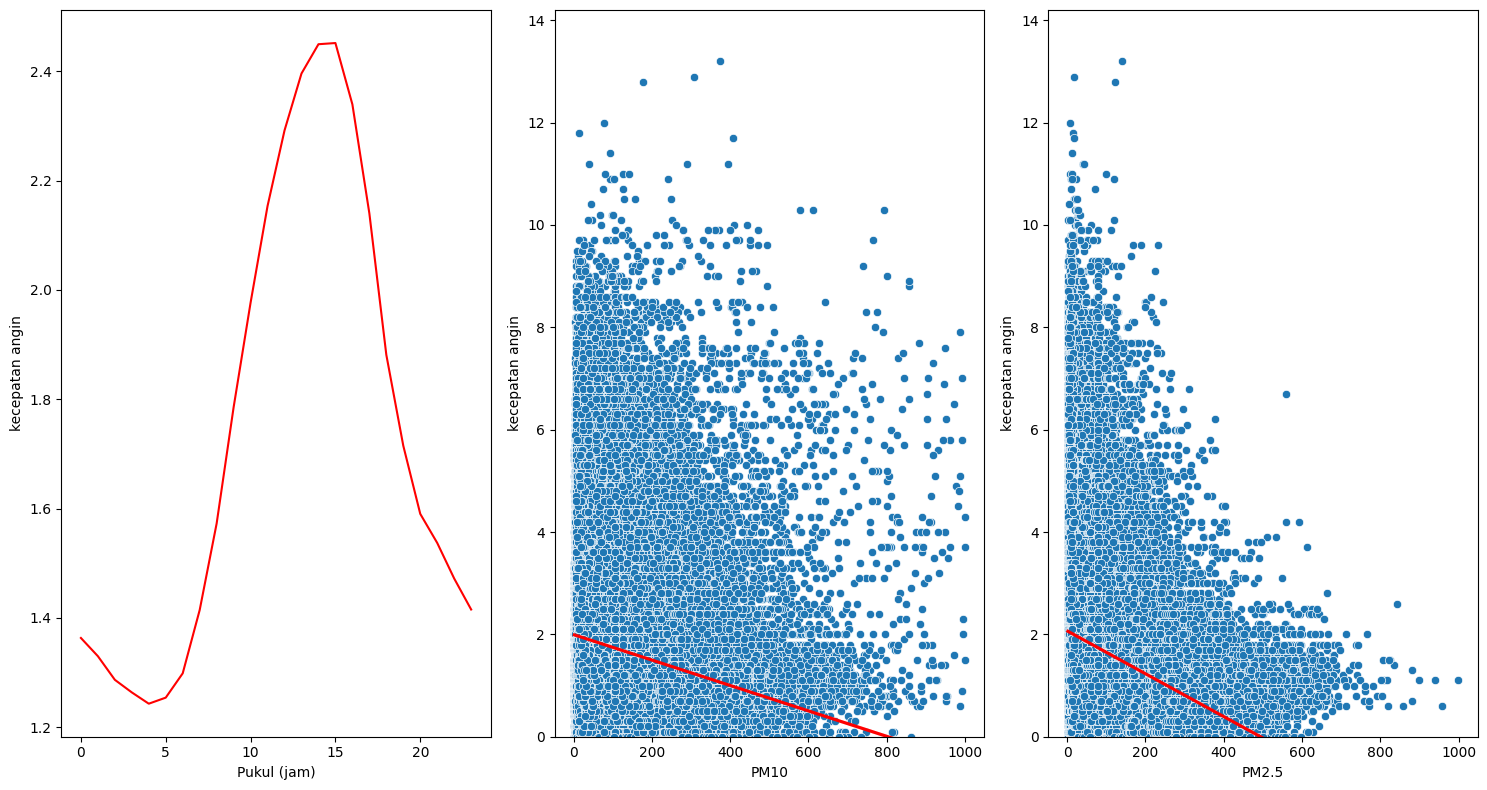

In [53]:
jam = sorted(droped['hour'].unique())
rataan = droped.groupby('hour')['WSPM'].mean()
plt.figure(figsize=(15, 8))
plt.subplot(1, 3, 1)
plt.plot(jam,rataan,"r-",label='PM2.5')
plt.ylabel("kecepatan angin")
plt.xlabel("Pukul (jam)")
plt.subplot(1, 3, 2)
sb.scatterplot(x=droped['PM10'],y=droped['WSPM'])
sb.regplot(x=droped['PM10'],y=droped['WSPM'], scatter=False, color='r')
plt.ylim(0, max(droped['WSPM']) + 1)
plt.ylabel("kecepatan angin")
plt.xlabel("PM10")

plt.subplot(1, 3, 3)
sb.scatterplot(x=droped['PM2.5'],y=droped['WSPM'])
sb.regplot(x=droped['PM2.5'],y=droped['WSPM'], scatter=False, color='r')
plt.ylabel("kecepatan angin")
plt.xlabel("PM2.5")
plt.ylim(0, max(droped['WSPM']) + 1)

plt.tight_layout()
plt.show()

Pada plot berdasarkan waktu terlihat bahwa indeks polusi baik PM2.5 dan PM10 mengalami peningkatan pada siang-malam-pagi. Apabila dikaitkan dengan kecepatan udara nilai keduanya berbanding terbalik (walau nilai kedekatan regresinya tak terlalu baik). Hal ini terlihat pada pagi hingga siang, kecepatan udara meningkat dan mencapai titik tertingginya, dan akan menurun setelahnya hingga keesokan harinya. Data ini kemudian menunjukkan bahwa kecepatan angin mampu mereduksi nilai polutan. Hal ini didukung dengan sumber berikut, yang menyatakan bahwa kecepatan angin yang tinggi mampu mengangkat polutan agar tatak terlalu lama berada di area rendah.
<br>
sumber : https://airly.org/en/why-is-air-quality-worse-at-night/#:~:text=During%20the%20day%2C%20the%20sun%20heats%20up%20the%20ground%2C%20causing,and%20settle%20near%20the%20surface.

## Analisis Lanjutan (Opsional)

In [58]:
stasiun = ['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan', 
           'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan', 
           'Wanliu', 'Wanshouxigong']
#berdasarkan google map
koor = {
    'Aotizhongxin': (39.988, 116.407),
    'Changping': (40.217, 116.231),
    'Dingling': (40.296, 116.181),
    'Dongsi': (39.928, 116.417),
    'Guanyuan': (39.933, 116.365),
    'Gucheng': (39.927, 116.202),
    'Huairou': (40.316, 116.637),
    'Nongzhanguan': (39.936, 116.454),
    'Shunyi': (40.126, 116.654),
    'Tiantan': (39.883, 116.412),
    'Wanliu': (39.974, 116.299),
    'Wanshouxigong': (39.886, 116.361)
}

rataan = droped.groupby('station')['PM10'].mean()
rataan_df = rataan.reset_index()

rataan_df['coordinates'] = rataan_df['station'].map(koor)
rataan_df['geometry'] = rataan_df['coordinates'].apply(lambda x: Point(x[1], x[0]))

gdf = gpd.GeoDataFrame(rataan_df, geometry='geometry')
gdf.set_crs(epsg=4326, inplace=True)

m = folium.Map(location=[39.9, 116.4], zoom_start=10, tiles='CartoDB positron', 
                scrollWheelZoom=False, zoom_control=False)

heat_data = [[point.y, point.x, pm] for point, pm in zip(gdf.geometry, gdf['PM10']) if 80 <= pm <= 120]
gradient = {
    0.0: 'blue',
    0.4: 'green',
    0.7: 'yellow',     
    1.0: 'red'
}

max_pm25 = 90 
heat_data_scaled = [[point[0], point[1], point[2] / max_pm25] for point in heat_data]

HeatMap(
    heat_data_scaled, 
    gradient=gradient, 
    radius=25, 
    blur=15
).add_to(m)

for station, (lat, lon) in koor.items():
    pm_value = rataan_df.loc[rataan_df['station'] == station, 'PM10'].values[0]
    folium.Marker(
        location=[lat, lon],
        popup=f"{station}: {pm_value:.2f}",
        icon=folium.Icon(color='blue')
    ).add_to(m)
m

Dengan mencari data lokasi 'station' (tempat pemantauan 'Air Quality') melalui Chatbot AI (kemungkinan tak tepat), didapat bahwa daerah Huairou, Dingling, dan Changping berada pada daerah yang tinggi (latitude >40 dibanding daerah lainnya yaitu <40). Selain, itu faktanya daerah yang berdekatan akan memiliki angka indeks polutansi yang mirip, hal ini membuktikan bahwa angin membawa polutan dan daerah sekitar akan terdampak polusi

## Conclusion

- Daerah akan memengaruhi kualitas udara. Huairou, Dingling, dan Changping memiliki kualitas udara yang baik sebab berada di daerah datarn tinggi dan tidak terlalu berbagi polusi dengan daerah sekitar.
- SO, NO2, dan CO yang tinggi dapat menaikkan angka indeks PM2.5 dan PM10 sedangkan O3 tidak memiliki hubungan yang signifikan terhadap kedua indeks tersebut.
- Kecepatan angin menjadi salah satu faktor dalam indeks PM2.5 dan PM10. Kecepatan angin mampu mereduksi nilai kedua indeks tersebut